In [1]:
import finalExamUtilities as fEU

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import scipy.linalg as sp_la
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Overall Review <a class="anchor" id="review"></a>


Today we are going to load a dataset and use it to review each type of data analysis method we have looked at this semester.

Here's the scenario: You have been hired for the summer by a local realty company that manages apartment complexes. When someone applies to rent an apartment, the company collects information about the applicant, including information about debt, income and credit rating. The company has a shortage of staff to process applications, and is also dealing with a fair housing-related lawsuit. The company would like you to develop an automated solution for determining whether applicants are rent-worthy.

# Prepare The Data <a class="anchor" id="prepData"></a>

## 1. Load and look at your data <a class="anchor" id="loadData"></a>

* Where does the data come from? *This data set comes from https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data which in turn comes from https://archive.ics.uci.edu/ml/datasets/Credit+Approval. It was originally contributed in Robert Quinlan in the late 1980s/early 1990s.*
  * What are the variables? *debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved'*
  * What are the types of the variables? *after conversion, all are type float64*
* Are there any ethical concerns with using this data? *This data set is about credit scoring, so (unless it's artificial, in which case we have different concerns!) it includes information about individuals.
  * We check whether any personally identifying information is in the data and no, there is none (no names, addresses, social security numbers, etc).
  * Even if no PII is in the data, there are sensitive features in the data such as age, gender and ethnicity. Models that use these features should be subject to extra scrutiny to make sure they are not biased in favor of one group of people over another. In our experiments today, we will *exclude these features*.
  * The data includes a label for credit-worthiness. Historically, human-made decisions about credit-worthiness (and rent-worthiness) have been notably subject to bias. So we should tell the realty company not to deploy any model we create as the sole decision maker.*

Referring to the cell below, which contains a report of the data with sensitive variables 'age', 'gender', 'ethnicity' and 'citizen' filtered out, please answer:

* How many data points are there?
* How many variables are there?
* What is the type of each variable?
  * syntactic types:
  * semantic types:
* Are the variables independent of each other? How do you make that assessment?
* Is there a value for each variable for each data point? 
* Do the values make sense? Are there outliers or other insanities?


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved']

Inspect the data
data shape
 (690, 11) 
data type
 float64
missing data: none
data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.758725  0.760870      0.763768       2.223406      0.523188  0.427536   
3   4.974555  0.426553      0.424766       3.344087      0.499462  0.494721   

   creditscore  driverslicense          zip         income  approved  
0    67.000000        1.000000  2000.000000  100000.000000  1.000000  
1     0.000000        0.000000     0.000000       0.000000  0.000000  
2     2.400000        0.457971   180.547826    1017.385507  0.444928  
3     4.859415        0.498230   173.844212

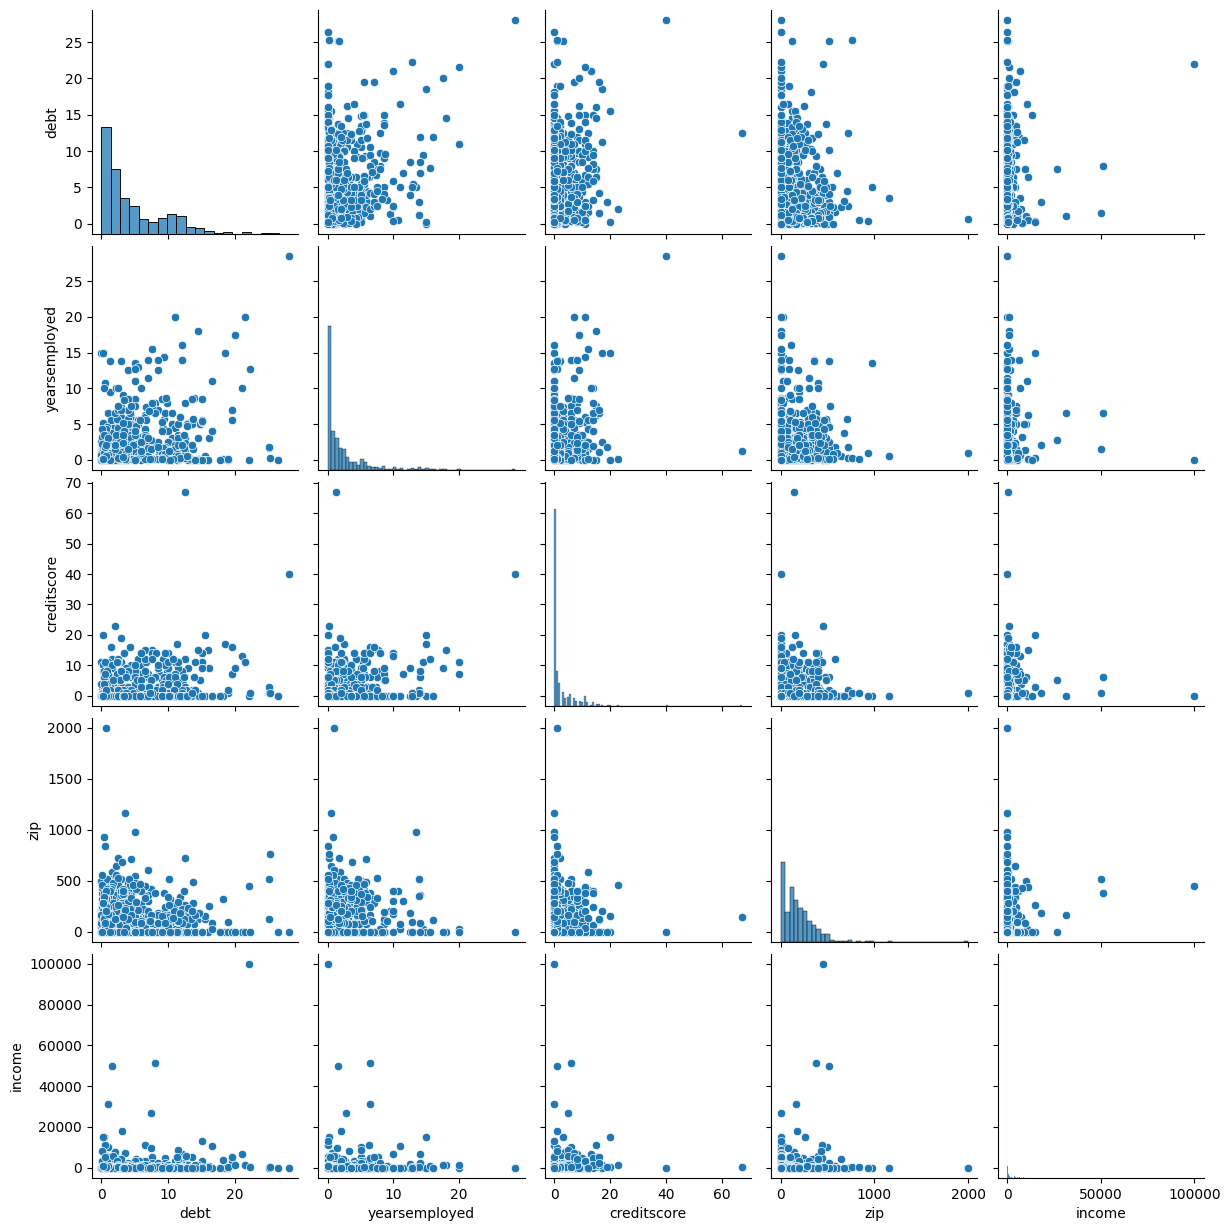


Transform the data
data shape 
 (690, 11) 
data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.758725  0.760870      0.763768       2.223406      0.523188  0.427536   
3   4.974555  0.426553      0.424766       3.344087      0.499462  0.494721   

   creditscore  driverslicense          zip         income  approved  
0    67.000000        1.000000  2000.000000  100000.000000  1.000000  
1     0.000000        0.000000     0.000000       0.000000  0.000000  
2     2.400000        0.457971   180.547826    1017.385507  0.444928  
3     4.859415        0.498230   173.844212    5206.325793  0.496958  
data shape 
 (690, 11) 
data max, min, mean, std
            debt       married  bankcustomer  yearsemployed  priordefault  \
0  4.672031e+00  5.606119e-01  5.561456e-01   7.85762

In [2]:
transformedData, columns = fEU.prepData(dataName="cc", type="clustering", fractionToKeep=1)

<p style="page-break-after:always;"></p>

## 2. Consider Transforming/Normalizing the Data <a class="anchor" id="normalizeData"></a>

* What three types of basic data transformation do we know? *translation, scaling, rotation*
* For data with two variables, what is the transformation matrix for each type? *see day 8, day 10*
* For data with three variables, what is the transformation matrix for each direction of rotation? *see day 10*
* Do we need to transform the credit-worthiness data? Why or why not? *yes, because some variables have much larger ranges than others*
* If we do need to transform it, what will we do? *min-max-local!*


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved']

Inspect the data
data shape
 (690, 11) 
data type
 float64
missing data: none
data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.758725  0.760870      0.763768       2.223406      0.523188  0.427536   
3   4.974555  0.426553      0.424766       3.344087      0.499462  0.494721   

   creditscore  driverslicense          zip         income  approved  
0    67.000000        1.000000  2000.000000  100000.000000  1.000000  
1     0.000000        0.000000     0.000000       0.000000  0.000000  
2     2.400000        0.457971   180.547826    1017.385507  0.444928  
3     4.859415        0.498230   173.844212

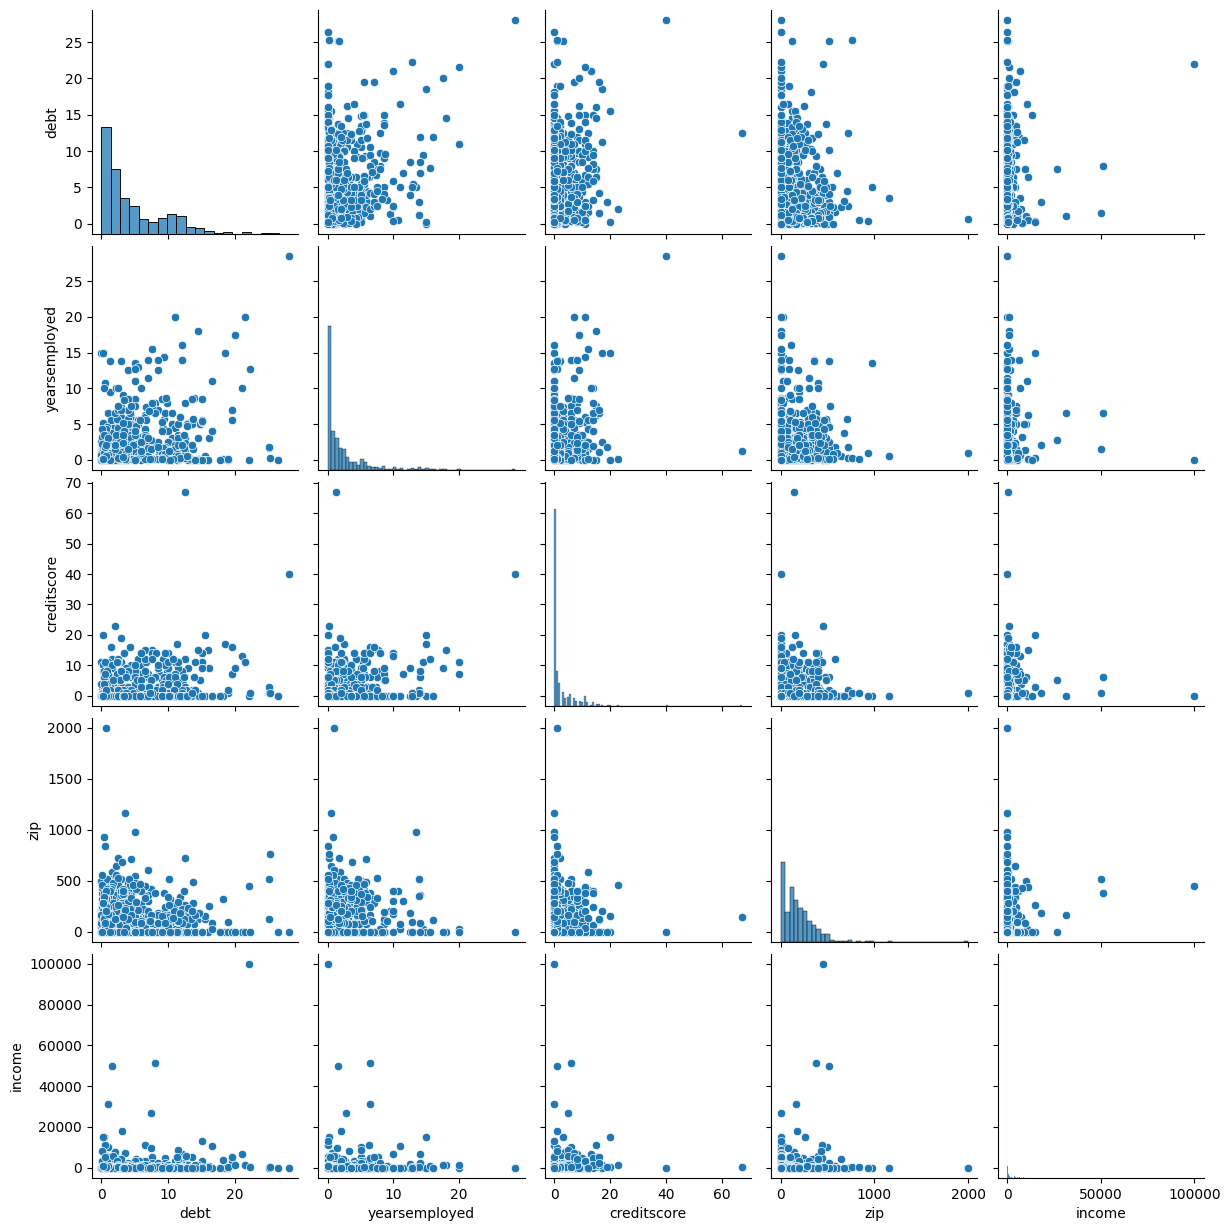


Split the data, dependent variable  10 , to keep  -1
10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 2
training data shape 
 (551, 10) 
training data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.830789  0.751361      0.754991       2.368875      0.551724  0.421053   
3   5.006157  0.432224      0.430093       3.454676      0.497317  0.493728   

   creditscore  driverslicense          zip         income  
0    67.000000        1.000000  2000.000000  100000.000000  
1     0.000000        0.000000     0.000000       0.000000  
2     2.450091        0.450091   182.301270    1109.326679  
3     5.134556        0.497503   179.484359    5762.338089  

dev data shape 
 (69, 10) 
dev data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  2

In [3]:
transformedTrain, transformedDev, transformedTest, trainY, devY, testY, columns = fEU.prepData(dataName="cc", type="classification", fractionToKeep=-1)

<p style="page-break-after:always;"></p>

## 3. Consider Dimensionality Reduction <a class="anchor" id="pcaData"></a>

* In what circumstances do we want to use dimensionality reduction? *lots of variables; including if we have more variables than data points*
* What method do we use for dimensionality reduction? *PCA*
* What are the steps in this method? *see day 18*
* One way to choose how many dimensions to keep is by looking at an elbow plot. Looking at the one below, how many dimensions should we keep for this data set in order to retain 80% of the cumulative explained variance? *at least 5*

['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income']
(551, 10)


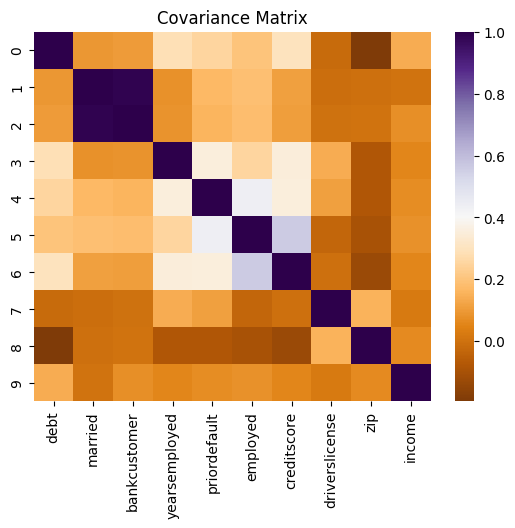

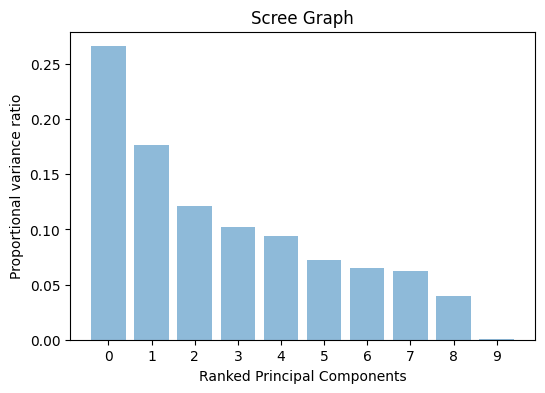

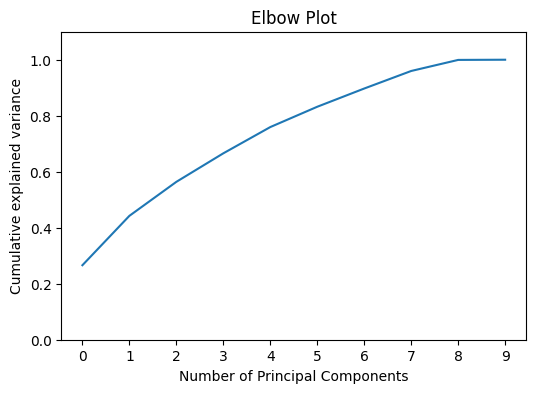

In [4]:
print(columns)
print(transformedTrain.shape)
pca = fEU.PCA(centered=True, plot=True)
pca.fit(transformedTrain, columns)
#projected = pca.project(transformedData, ??)

<p style="page-break-after:always;"></p>

[Go back to the top](#review)


# Model <a class="anchor" id="model"></a>

* What would be a reasonable choice of dependent variable in this dataset, and why, for:
  * regression? *any quantitative continuous variable, but not zip code*
  * classification? *any qualitative variable*
* What shall we split our data into, and why? *train and test, or train/dev/test, so that we can assess how well the model generalizes*
* What do we need to watch out for as we split our data? *summary statistics of each split should be similar; including, if doing classification, that we have some of each class / label in each split; also, if there are time dependencies in the data we should do a temporal split*

## 4. Regression <a class="anchor" id="regression"></a>

* To fit a regression, the type of the dependent variable should be what? *quantiative continuous*
* Name and define the loss function for regression. *MSSE: see day 11*
* The normal equation is one method for fitting a linear regression. What is the normal equation? When can we *not* use it? *in CS251 we only fit a regression using least squares*
* If I have a lot of variables in my data, how can I effectively decide which to include in my regression? *stepwise regression: see day 16*
* What are the scores for the regressions below, and what do they mean (in terms of explanation of relationship between the variables, and in terms of using the model for prediction)? *there are the regression coefficients, which correspond to the weight for each independent variable and the bias. There are also r-squared values, which tell the goodness of fit of the regression model*


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income']

Inspect the data
data shape
 (690, 10) 
data type
 float64
missing data: none
data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.758725  0.760870      0.763768       2.223406      0.523188  0.427536   
3   4.974555  0.426553      0.424766       3.344087      0.499462  0.494721   

   creditscore  driverslicense          zip         income  
0    67.000000        1.000000  2000.000000  100000.000000  
1     0.000000        0.000000     0.000000       0.000000  
2     2.400000        0.457971   180.547826    1017.385507  
3     4.859415        0.498230   173.844212    5206.325793  


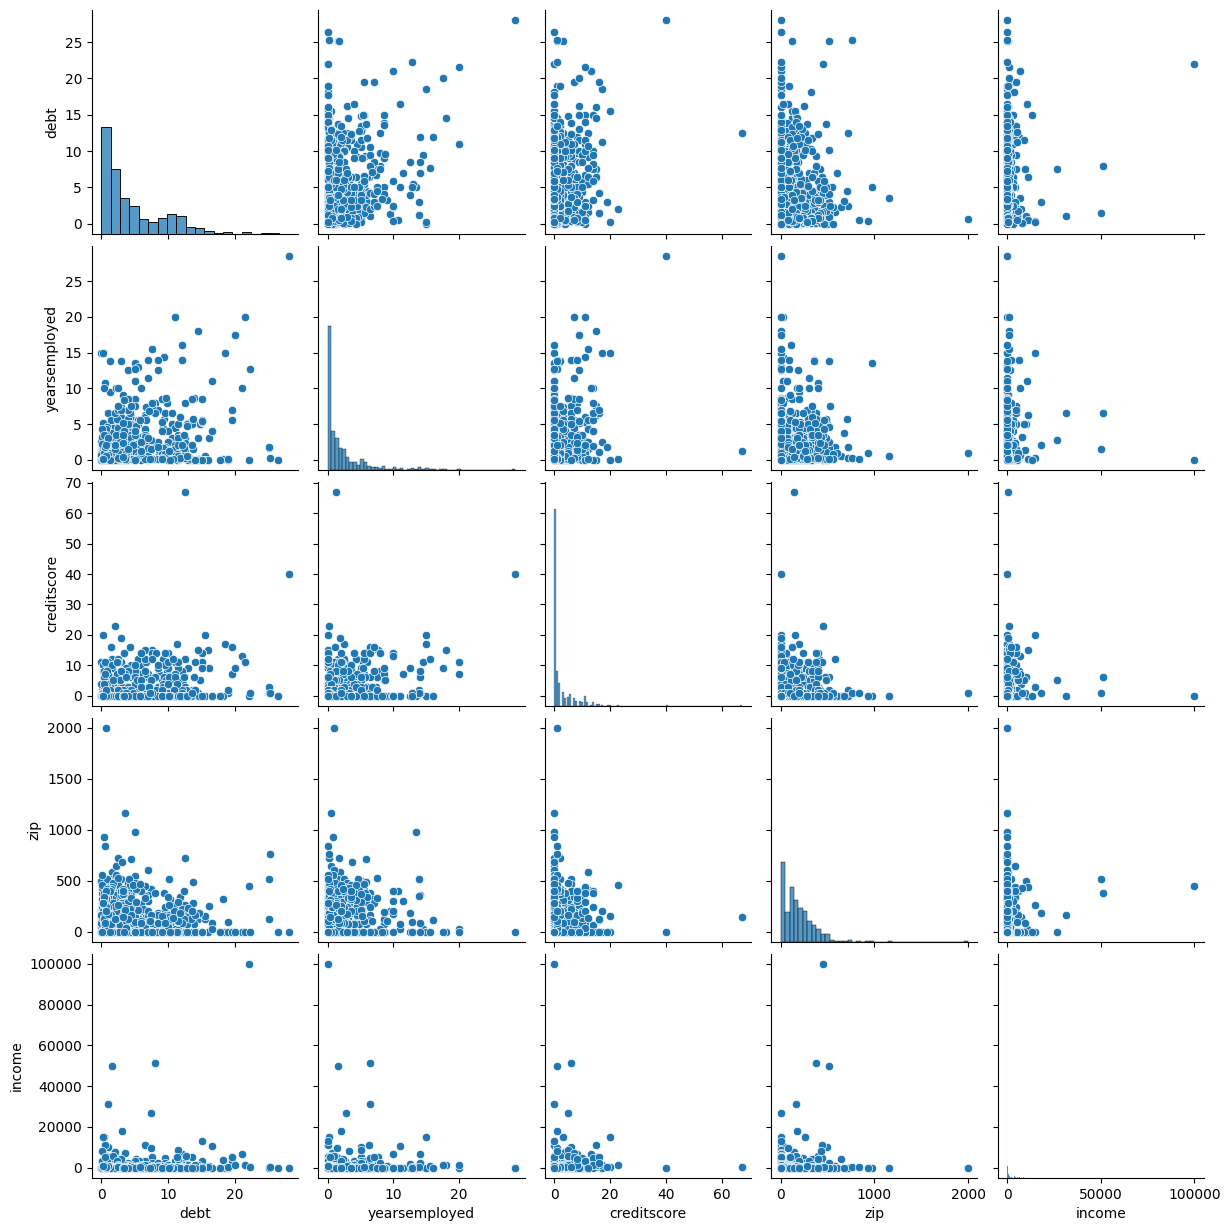


Split the data, dependent variable  6 , to keep  -1
6 [0, 1, 2, 3, 4, 5, 7, 8, 9] 240
training data shape 
 (378, 9) 
training data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.488069  0.748677      0.751323       2.388254      0.531746  0.359788   
3   4.721430  0.433774      0.432246       3.534227      0.498991  0.479938   

   driverslicense          zip       income  
0        1.000000  2000.000000  5000.000000  
1        0.000000     0.000000     0.000000  
2        0.484127   189.121693   158.656085  
3        0.499748   190.640458   595.773126  

dev data shape 
 (41, 9) 
dev data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  20.000000  1.000000      1.000000      17.500000      1.000000  1.000000   
1   0

In [5]:
transformedTrain, transformedDev, transformedTest, trainY, devY, testY, columns = fEU.prepData(dataName="cc", type="regression", fractionToKeep=-1)

In [6]:
%%time

# Linear regression on the transformed data

lr = LinearRegression().fit(transformedTrain, trainY)
print(lr.score(transformedDev, devY))
print(lr.predict(transformedDev))

0.4167919247896583
[-0.78530247 -0.74623382  0.01529859 -0.78721435  0.12666109 -0.3770231
  0.63956378  5.5309351   5.93528984  0.3718103   3.90102071 -0.64574411
 -0.61994739  4.13820647  2.9871488  -0.74165159  1.61167179  0.26202034
  7.3357898  -0.62750417 -1.05694945 -0.5064659  -0.76937774 -0.85728959
 -0.25528119 -0.61093717 -0.54754475  0.51953007 -0.94351486  5.26342488
  4.40737604 -0.55315302  0.33090485  4.00819083 -0.21818178  3.62905108
 -0.20933121  0.19123472  3.63420465  4.55522388 11.13255057]
CPU times: user 8.62 ms, sys: 148 µs, total: 8.76 ms
Wall time: 334 ms


In [7]:
%%time

# Polynomial regresson the transformed data, degree 2

pf = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = True)
polynomial2Train = pf.fit_transform(transformedTrain)
lr = LinearRegression().fit(polynomial2Train, trainY)
polynomial2Dev = pf.fit_transform(transformedDev)
print(lr.score(polynomial2Dev, devY))

0.4642707012534738
CPU times: user 9.24 ms, sys: 3.85 ms, total: 13.1 ms
Wall time: 18.5 ms


In [8]:
%%time

# Polynomial regresson the transformed data, degree 3

pf = PolynomialFeatures(degree = 3, include_bias = False, interaction_only = True)
polynomial3Train = pf.fit_transform(transformedTrain)
lr = LinearRegression().fit(polynomial3Train, trainY)
polynomial3Dev = pf.fit_transform(transformedDev)
print(lr.score(polynomial3Dev, devY))

-0.07657802681054338
CPU times: user 34.6 ms, sys: 3.63 ms, total: 38.2 ms
Wall time: 37.5 ms


<p style="page-break-after:always;"></p>

[Go back to the top](#review)

## 5. Clustering <a class="anchor" id="clustering"></a>

* In what circumstances would we want to cluster our data? *we have a lot of it, no dependent variable, and want to understand it*
* Clustering requires a distance metric. Name and define a distance metric *other than Euclidean distance*. *see day 23*
* For k-means clustering, we minimize *inertia*. Define inertia. *see day 21*
* k-means clustering is sensitive to the structure of the input data. In what way? How can we fix this type of issue with data structure? *if the data has some variables with bigger ranges than others, it will mess things up; fix using normalization. if the data has a lot of variables, all the distances will become really large; fix using PCA.*
* One way to choose $k$ is by inspecting an elbow plot. Looking at the one below, what would be a good value for $k$ for this data? Why? *any value corresponding to a change point - a point where the curve changes*
* Looking at the two scatter plots - one from the original data and one from the PCA projected data - which is clearer to you? Why? *usually the PCA projected one will be clearer*


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved']

Inspect the data
data shape
 (690, 11) 
data type
 float64
missing data: none
data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.758725  0.760870      0.763768       2.223406      0.523188  0.427536   
3   4.974555  0.426553      0.424766       3.344087      0.499462  0.494721   

   creditscore  driverslicense          zip         income  approved  
0    67.000000        1.000000  2000.000000  100000.000000  1.000000  
1     0.000000        0.000000     0.000000       0.000000  0.000000  
2     2.400000        0.457971   180.547826    1017.385507  0.444928  
3     4.859415        0.498230   173.844212

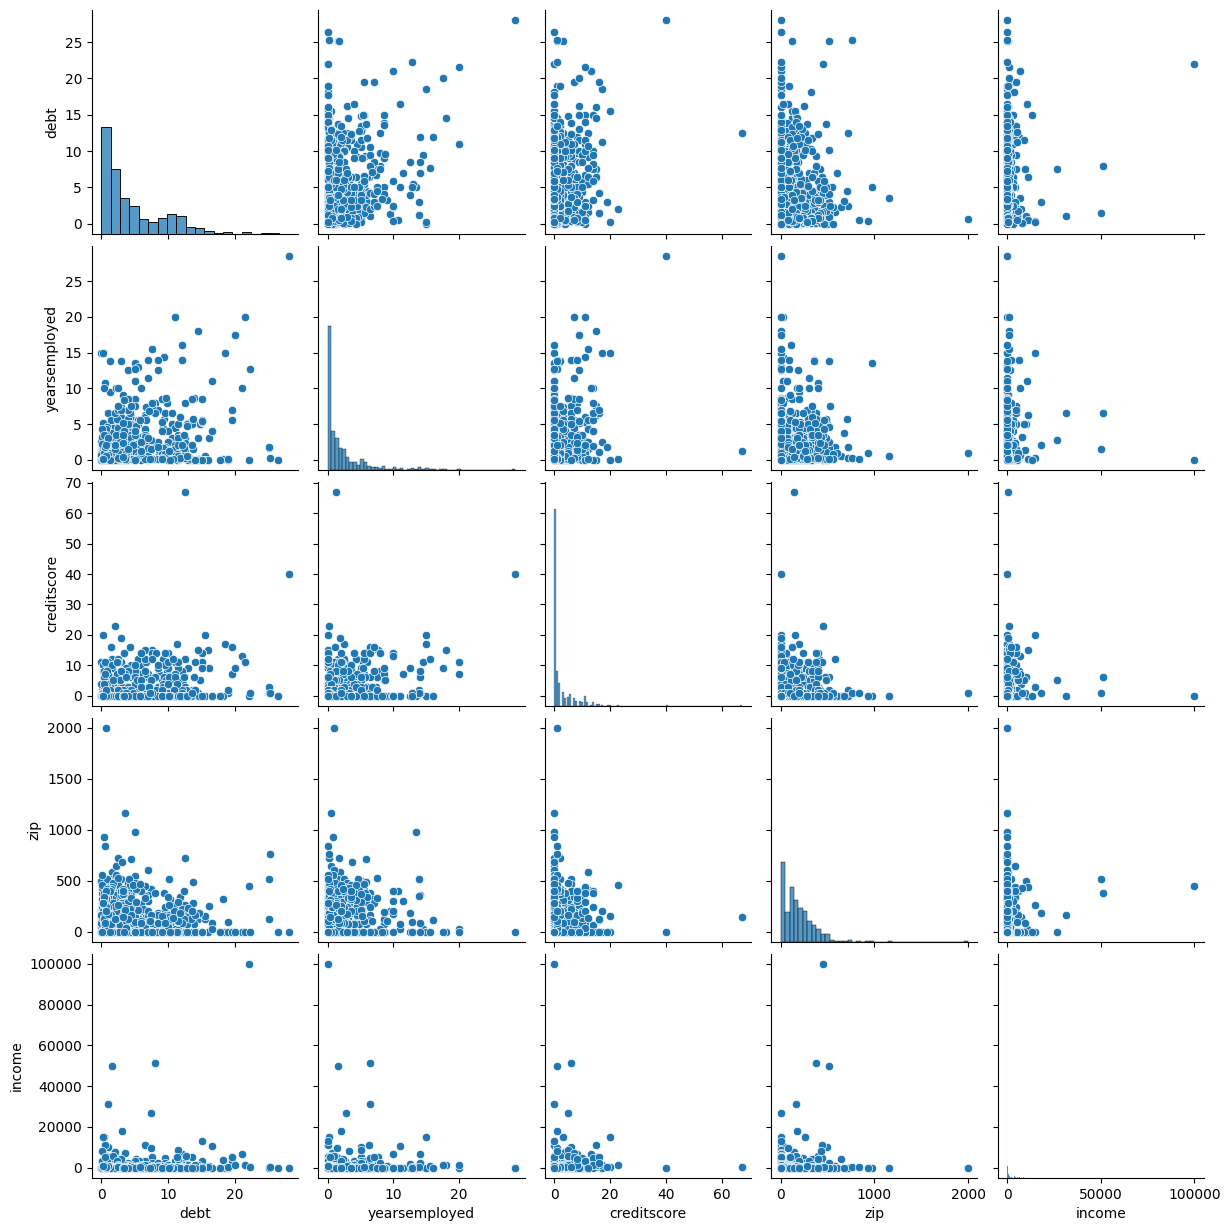


Transform the data
data shape 
 (690, 11) 
data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.758725  0.760870      0.763768       2.223406      0.523188  0.427536   
3   4.974555  0.426553      0.424766       3.344087      0.499462  0.494721   

   creditscore  driverslicense          zip         income  approved  
0    67.000000        1.000000  2000.000000  100000.000000  1.000000  
1     0.000000        0.000000     0.000000       0.000000  0.000000  
2     2.400000        0.457971   180.547826    1017.385507  0.444928  
3     4.859415        0.498230   173.844212    5206.325793  0.496958  
data shape 
 (690, 11) 
data max, min, mean, std
            debt       married  bankcustomer  yearsemployed  priordefault  \
0  4.672031e+00  5.606119e-01  5.561456e-01   7.85762

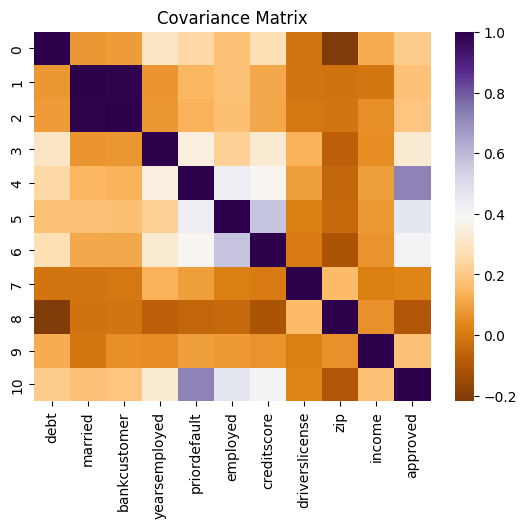

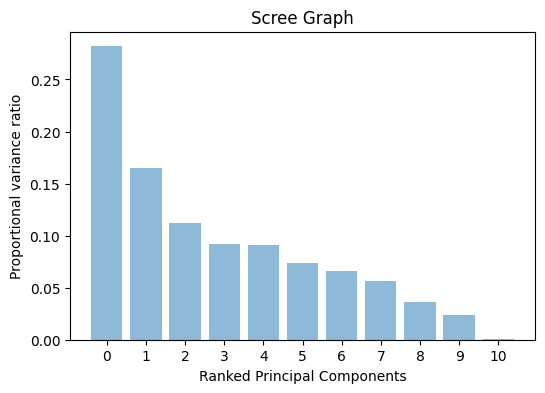

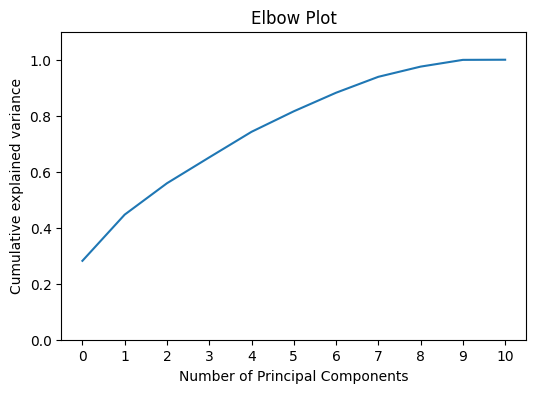

In [9]:
transformedData, columns = fEU.prepData(dataName="cc", type="clustering", fractionToKeep=1)
projectedData, _ = fEU.projectData(transformedData, 3, columns)

2


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4
6
8
10
12
14


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

16
18
20
22


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


24
26
28


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


30
32
34


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


36
38


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


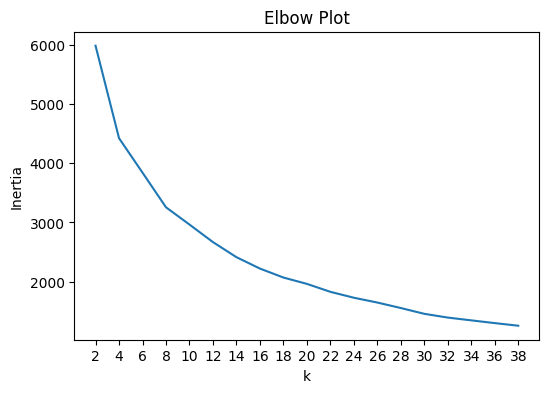

CPU times: user 1.94 s, sys: 87.2 ms, total: 2.03 s
Wall time: 2.01 s


In [10]:
%%time

# Clustering on the transformed data, choose k

fEU.fitExploreKMeans(transformedData, 2, 40, 2)

CPU times: user 169 ms, sys: 31.7 ms, total: 200 ms
Wall time: 195 ms


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: >

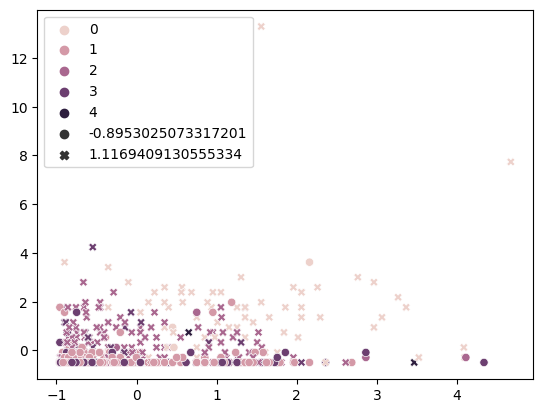

In [11]:
%%time

# Clustering on the transformed data, best k
km = KMeans(n_clusters=5, random_state=0).fit(transformedData)
sns.scatterplot(x=transformedData[:, 0], y=transformedData[:, 6], hue=km.labels_, style=transformedData[:, -1])

2
4
6
8
10
12


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

14
16
18
20


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


22


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


24
26
28


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


30
32
34


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


36
38


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


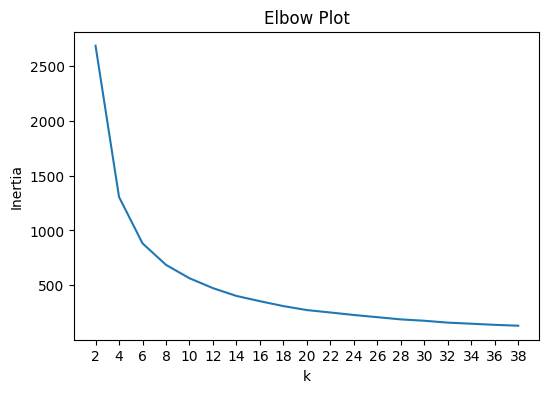

CPU times: user 2.3 s, sys: 67.5 ms, total: 2.36 s
Wall time: 1.89 s


In [12]:
%%time

# Clustering on the PCA projected data, choose k

fEU.fitExploreKMeans(projectedData, 2, 40, 2)

CPU times: user 176 ms, sys: 15.9 ms, total: 191 ms
Wall time: 124 ms


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: >

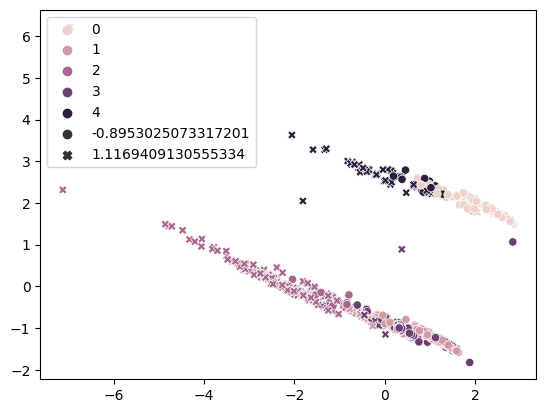

In [13]:
%%time

# Clustering on the PCA projected data, best k
km = KMeans(n_clusters=5, random_state=0).fit(projectedData)
sns.scatterplot(x=projectedData[:, 0], y=projectedData[:, 1], hue=km.labels_, style=transformedData[:, -1])

<p style="page-break-after:always;"></p>

[Go back to the top](#review)

# Classification <a class="anchor" id="classification"></a>

* To train a classifier, the type of the dependent variable should be what? *qualitative*
* We will use "credit-worthy" as a proxy for "rent-worthy". How many values does this variable have? *this variable is actually 'approved' and it has two values*
* How do we know how well a classification model works? *accuracy, TPR/FPR, P/R/F, ROC, AUC*

## 6. K-nearest neighbors <a class="anchor" id="knn"></a>

* How does the *fit* function work for k-nearest neighbors? *store the data!*
* How does the *predict* function work? *let the k nearest neighbors (according to some distance function) vote using their class assignments (labels*)
* One way to choose a value of $k$ is by looking at an elbow plot. Looking at the elbow plot below, what value of k would you choose for this data and why? *I think 20, as it has high accuracy without too big of a k*


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved']

Inspect the data
data shape
 (690, 11) 
data type
 float64
missing data: none
data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.758725  0.760870      0.763768       2.223406      0.523188  0.427536   
3   4.974555  0.426553      0.424766       3.344087      0.499462  0.494721   

   creditscore  driverslicense          zip         income  approved  
0    67.000000        1.000000  2000.000000  100000.000000  1.000000  
1     0.000000        0.000000     0.000000       0.000000  0.000000  
2     2.400000        0.457971   180.547826    1017.385507  0.444928  
3     4.859415        0.498230   173.844212

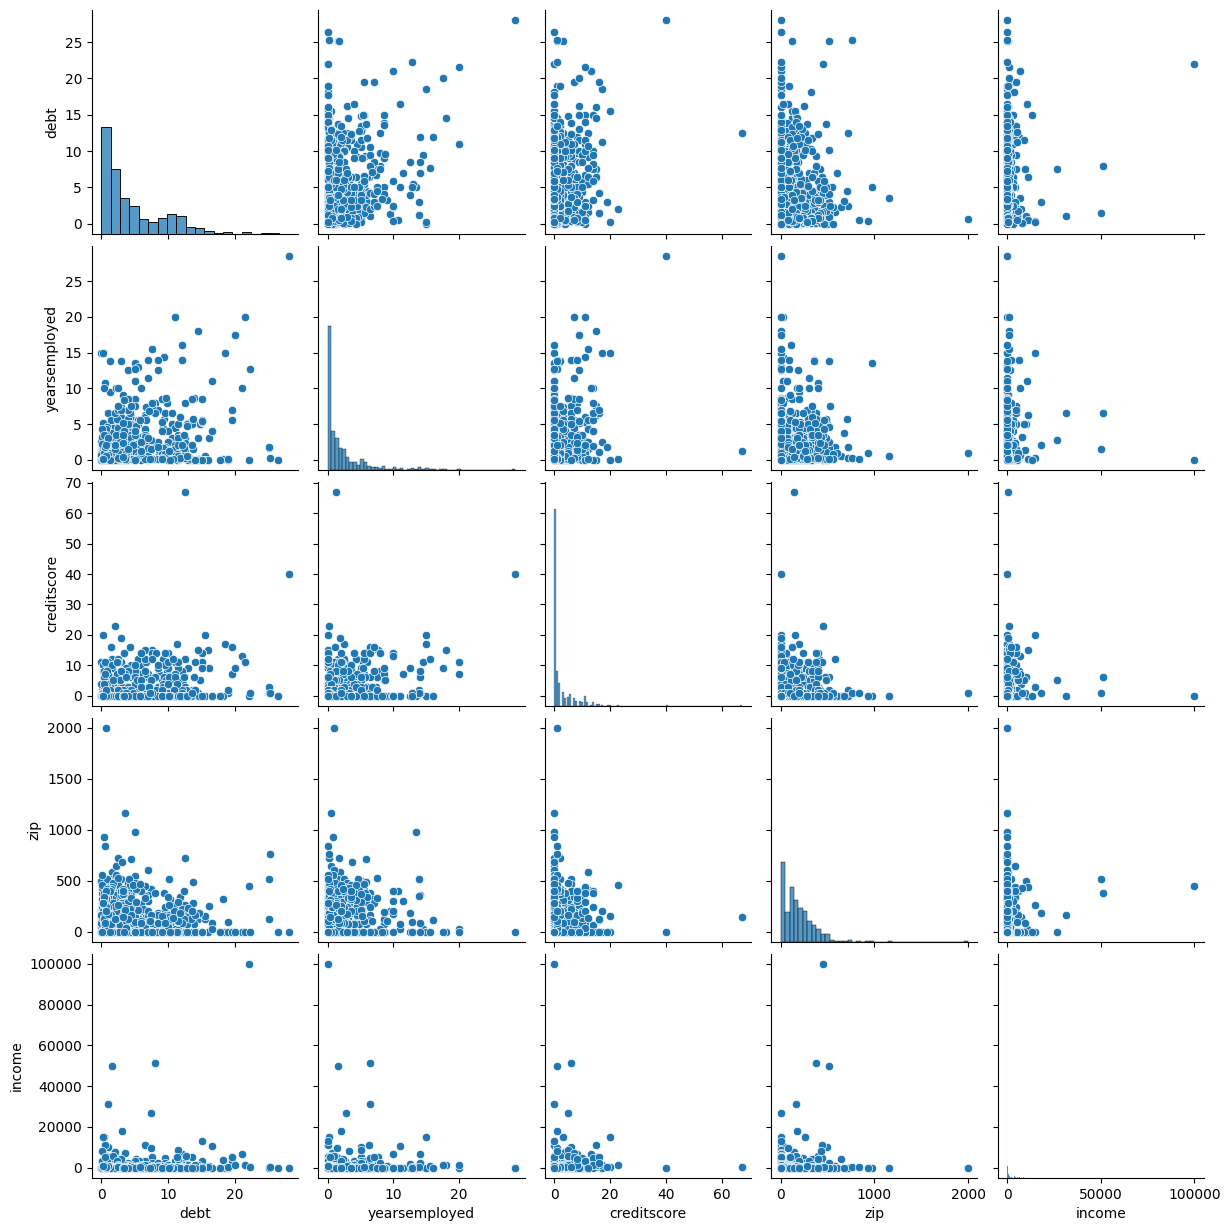


Split the data, dependent variable  10 , to keep  -1
10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 2
training data shape 
 (551, 10) 
training data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.830789  0.751361      0.754991       2.368875      0.551724  0.421053   
3   5.006157  0.432224      0.430093       3.454676      0.497317  0.493728   

   creditscore  driverslicense          zip         income  
0    67.000000        1.000000  2000.000000  100000.000000  
1     0.000000        0.000000     0.000000       0.000000  
2     2.450091        0.450091   182.301270    1109.326679  
3     5.134556        0.497503   179.484359    5762.338089  

dev data shape 
 (69, 10) 
dev data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  2

In [14]:
transformedTrain, transformedDev, transformedTest, trainY, devY, testY, columns = fEU.prepData(dataName="cc", type="classification", fractionToKeep=-1)

2
4
6
8
10
12
14
16
18
20
22
24
26
28


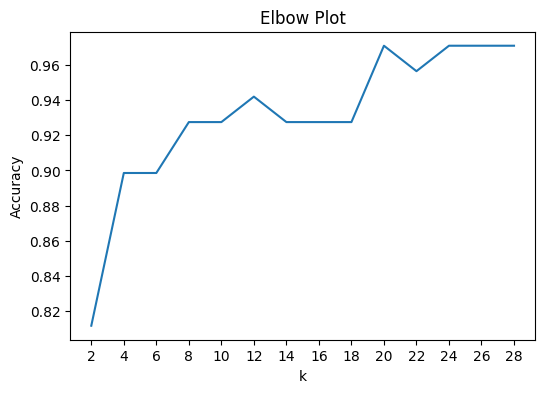

CPU times: user 274 ms, sys: 27.8 ms, total: 302 ms
Wall time: 331 ms


In [15]:
%%time

# Fit a kNN to the transformed train data, choose k using dev data; this is hyperparameter tuning

fEU.fitExploreKNN(transformedTrain, trainY, transformedDev, devY, 2, 30, 2)

In [16]:
%%time

# Fit a kNN to the transformed train data, best k, test using test data

knn = KNeighborsClassifier(n_neighbors=4).fit(transformedTrain, trainY)
print(knn.score(transformedTest, testY))
print(confusion_matrix(testY, knn.predict(transformedTest)))

0.7857142857142857
[[38  1]
 [14 17]]
CPU times: user 12.3 ms, sys: 16 µs, total: 12.3 ms
Wall time: 11.7 ms


<p style="page-break-after:always;"></p>

## 7.  Naive Bayes <a class="anchor" id="nb"></a>

* State Bayes rule. *see day 27*
* In Bayes rule, which parts are the posterior, prior, likelihood and evidence? *see day 27*
* Why do we call a Naive Bayes model "naive"? What does this allow us to do? *see day 29*
* A simple Naive Bayes model is based on relative frequencies of values of the variables in the training data. 
  * How can we account for values of variables we may not see for a particular class at train time? *Laplace smoothing*
  * The estimated probabilities output via this method, for any non-trivial number of variable values, will be very small. How can we handle this? *move to log space*
  * If a variable is quantitative (continuous or discrete) we can fit a Naive Bayes model using a probability density function for the variable. Name and define a probability distribution commonly used in this way. *Gaussian*


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved']

Inspect the data
data shape
 (690, 11) 
data type
 float64
missing data: none
data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.758725  0.760870      0.763768       2.223406      0.523188  0.427536   
3   4.974555  0.426553      0.424766       3.344087      0.499462  0.494721   

   creditscore  driverslicense          zip         income  approved  
0    67.000000        1.000000  2000.000000  100000.000000  1.000000  
1     0.000000        0.000000     0.000000       0.000000  0.000000  
2     2.400000        0.457971   180.547826    1017.385507  0.444928  
3     4.859415        0.498230   173.844212

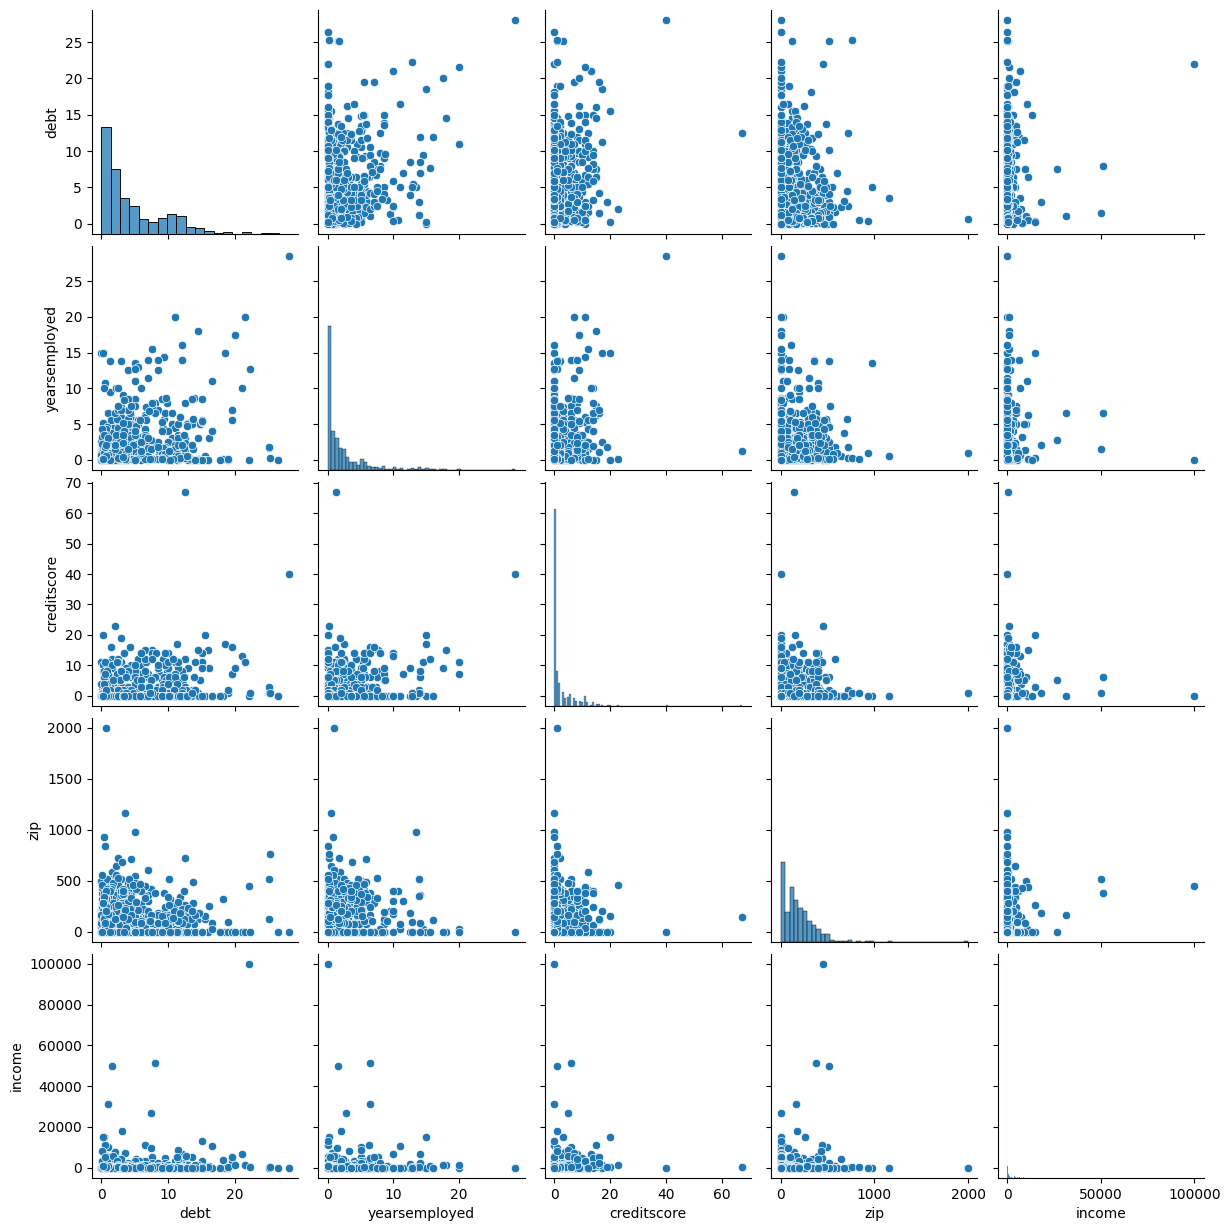


Split the data, dependent variable  10 , to keep  -1
10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 2
training data shape 
 (551, 10) 
training data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.830789  0.751361      0.754991       2.368875      0.551724  0.421053   
3   5.006157  0.432224      0.430093       3.454676      0.497317  0.493728   

   creditscore  driverslicense          zip         income  
0    67.000000        1.000000  2000.000000  100000.000000  
1     0.000000        0.000000     0.000000       0.000000  
2     2.450091        0.450091   182.301270    1109.326679  
3     5.134556        0.497503   179.484359    5762.338089  

dev data shape 
 (69, 10) 
dev data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  2

In [17]:
transformedTrain, transformedDev, transformedTest, trainY, devY, testY, columns = fEU.prepData(dataName="cc", type="classification", fractionToKeep=-1)

0.8142857142857143
[[38  1]
 [12 19]]


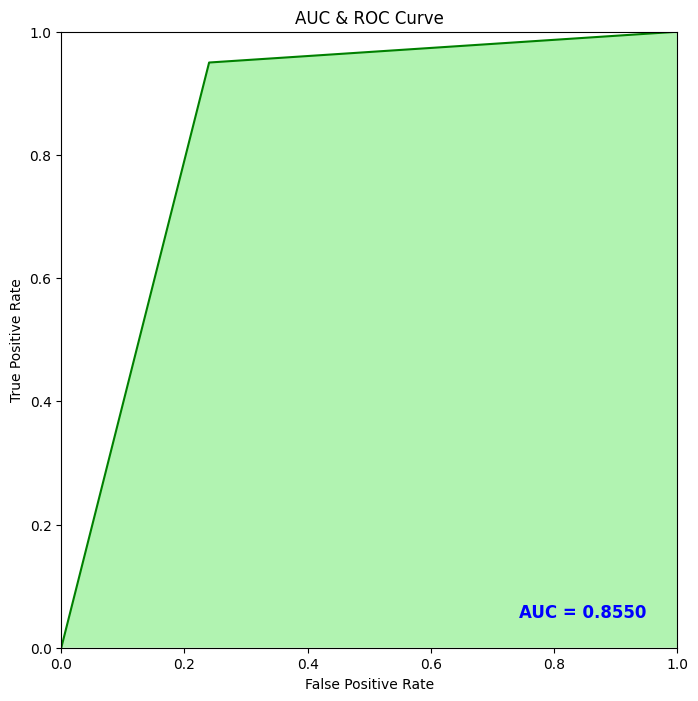

CPU times: user 224 ms, sys: 67.1 ms, total: 292 ms
Wall time: 304 ms


In [18]:
%%time

# Fit a naive Bayes model to the transformed train data, test using test data

gnb = GaussianNB().fit(transformedTrain, trainY)
print(gnb.score(transformedTest, testY))
print(confusion_matrix(testY, gnb.predict(transformedTest)))
fEU.aucRoc(gnb.predict(transformedTest), testY)

<p style="page-break-after:always;"></p>

[Go back to the top](#review)

## Evaluation and Visualization <a class="anchor" id="classificationEvaluation"></a>

* In addition to accuracy, we often create confusion matrices for a classifier.
  * Draw a confusion matrix and label the cells corresponding to true positives, true negatives, false positives and false negatives *see day 25*
  * Looking at the confusion matrix above, what can we say about the classes in this model? *the data is unbalanced, and the model is much better on the majority class*
  * Define true positive rate and false positive rate. *see day 25*
  * What is a ROC curve? How is it related to AUC? *see day 32*
  * For a multiclass classifier, what is a variant on the vanilla confusion matrix that we can use? *one column / row per class, one vs rest*

<p style="page-break-after:always;"></p>

[Go back to the top](#review)

# 8. RBF Networks <a class="anchor" id="rbfNetworks"></a>

* What is a radial basis function? *see day 33*
* What is the structure of a RBF network? *see day 33*
* In this course, what type of activation function did we define for the hidden nodes? *Gaussian!*
* What are the steps to training a RBF network? *fit a k means; then fit one or more linear regressions*
* For what types of modeling can we use a RBF network? *regression, classification*

Let's think about training a RBF network to determine whether an applicant is "rent-worthy".
* How many nodes will be in the input layer? *as many as our independent variables*
* How many nodes will be in the output layer? *two, since this is binary classification*
* Thinking about the k-means clustering we trained on this data earlier, how many nodes would you put in the hidden layer? *as many as the k you chose for k means*

## A Worked Example for Regression <a class="anchor" id="rbfRegression"></a>

Which is more accurate, linear regression (see earlier) or regression via RBF network?


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income']

Inspect the data
data shape
 (690, 10) 
data type
 float64
missing data: none
data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.758725  0.760870      0.763768       2.223406      0.523188  0.427536   
3   4.974555  0.426553      0.424766       3.344087      0.499462  0.494721   

   creditscore  driverslicense          zip         income  
0    67.000000        1.000000  2000.000000  100000.000000  
1     0.000000        0.000000     0.000000       0.000000  
2     2.400000        0.457971   180.547826    1017.385507  
3     4.859415        0.498230   173.844212    5206.325793  


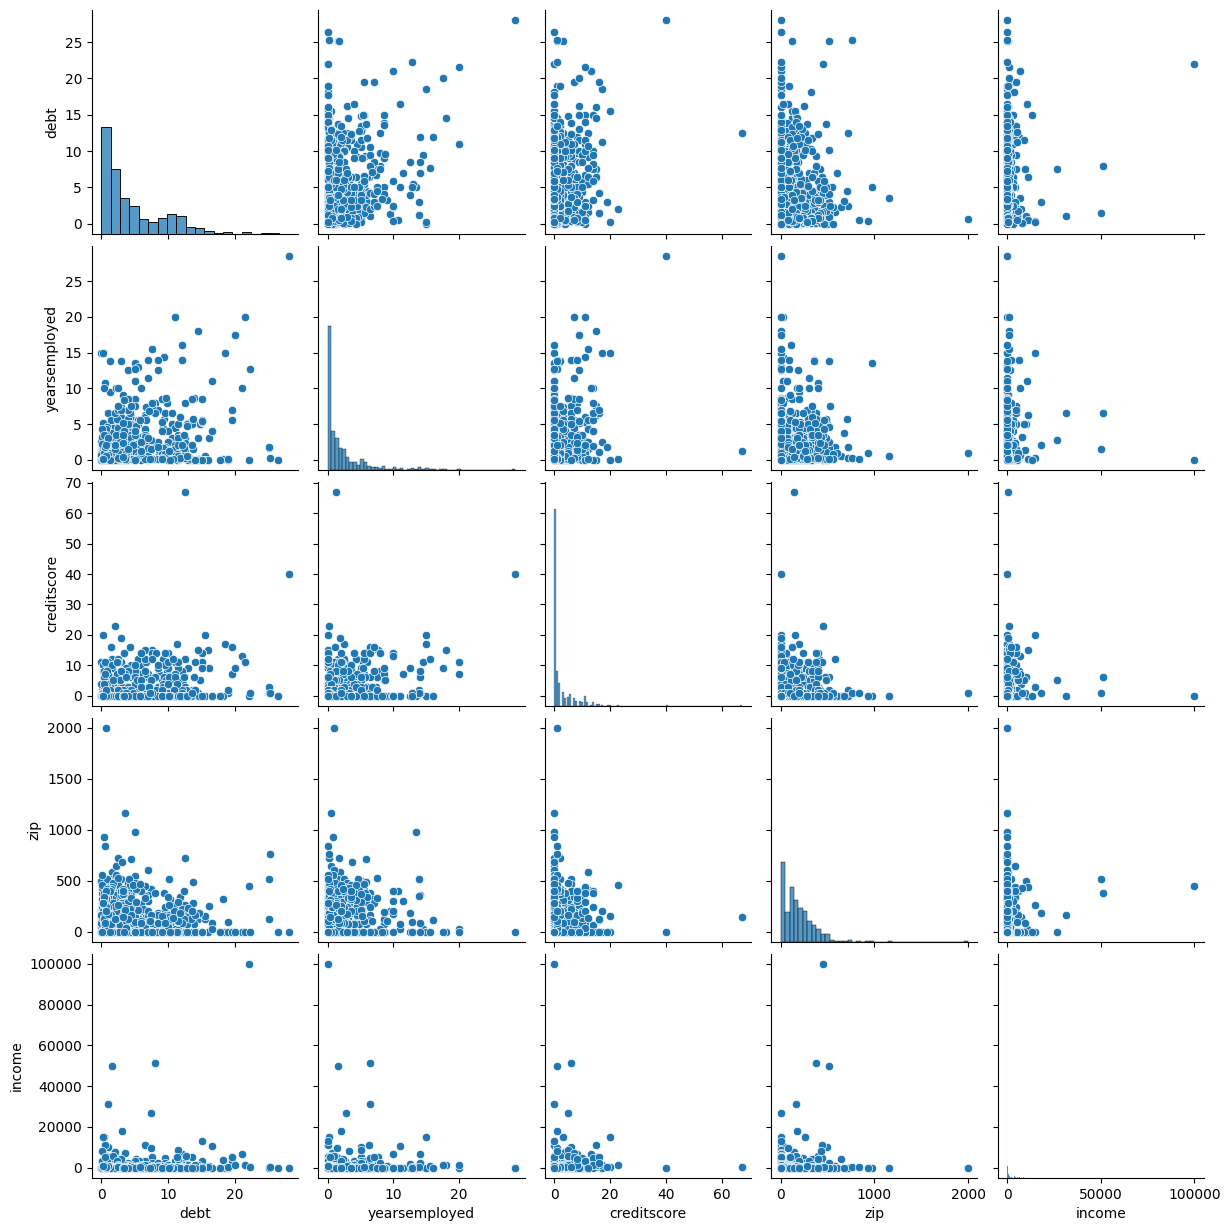


Split the data, dependent variable  6 , to keep  -1
6 [0, 1, 2, 3, 4, 5, 7, 8, 9] 240
training data shape 
 (378, 9) 
training data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.488069  0.748677      0.751323       2.388254      0.531746  0.359788   
3   4.721430  0.433774      0.432246       3.534227      0.498991  0.479938   

   driverslicense          zip       income  
0        1.000000  2000.000000  5000.000000  
1        0.000000     0.000000     0.000000  
2        0.484127   189.121693   158.656085  
3        0.499748   190.640458   595.773126  

dev data shape 
 (41, 9) 
dev data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  20.000000  1.000000      1.000000      17.500000      1.000000  1.000000   
1   0

In [19]:
transformedTrain, transformedDev, transformedTest, trainY, devY, testY, columns = fEU.prepData(dataName="cc", type="regression", fractionToKeep=-1)

2
3
4
5
6
7
8
9


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

10
11
12
13
14


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

15
16
17
18
19


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

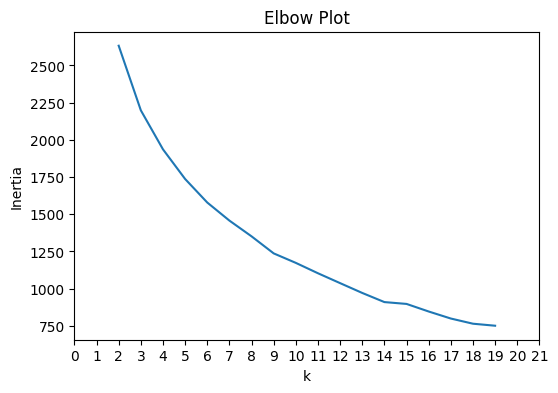

CPU times: user 1.34 s, sys: 83.6 ms, total: 1.43 s
Wall time: 980 ms


In [20]:
%%time

# Get the number of prototypes; this is hyperparameter tuning

rbf = fEU.RBFNetwork(type="regression")
rbf.explorePrototypes(transformedTrain, 2, 20, 1)

In [21]:
%%time

rbf.fit(transformedTrain, trainY, 15)
yhat = rbf.predict(transformedDev)
rbf.score(devY, yhat)

CPU times: user 125 ms, sys: 0 ns, total: 125 ms
Wall time: 101 ms


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.43876920550577225

<p style="page-break-after:always;"></p>

## A Worked Example for Classification <a class="anchor" id="rbfClassification"></a>

Which is most accurate, kNN classification, Naive Bayes classification, or classification via RBF network?


Load the data
data columns
 ['debt', 'married', 'bankcustomer', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'zip', 'income', 'approved']

Inspect the data
data shape
 (690, 11) 
data type
 float64
missing data: none
data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.758725  0.760870      0.763768       2.223406      0.523188  0.427536   
3   4.974555  0.426553      0.424766       3.344087      0.499462  0.494721   

   creditscore  driverslicense          zip         income  approved  
0    67.000000        1.000000  2000.000000  100000.000000  1.000000  
1     0.000000        0.000000     0.000000       0.000000  0.000000  
2     2.400000        0.457971   180.547826    1017.385507  0.444928  
3     4.859415        0.498230   173.844212

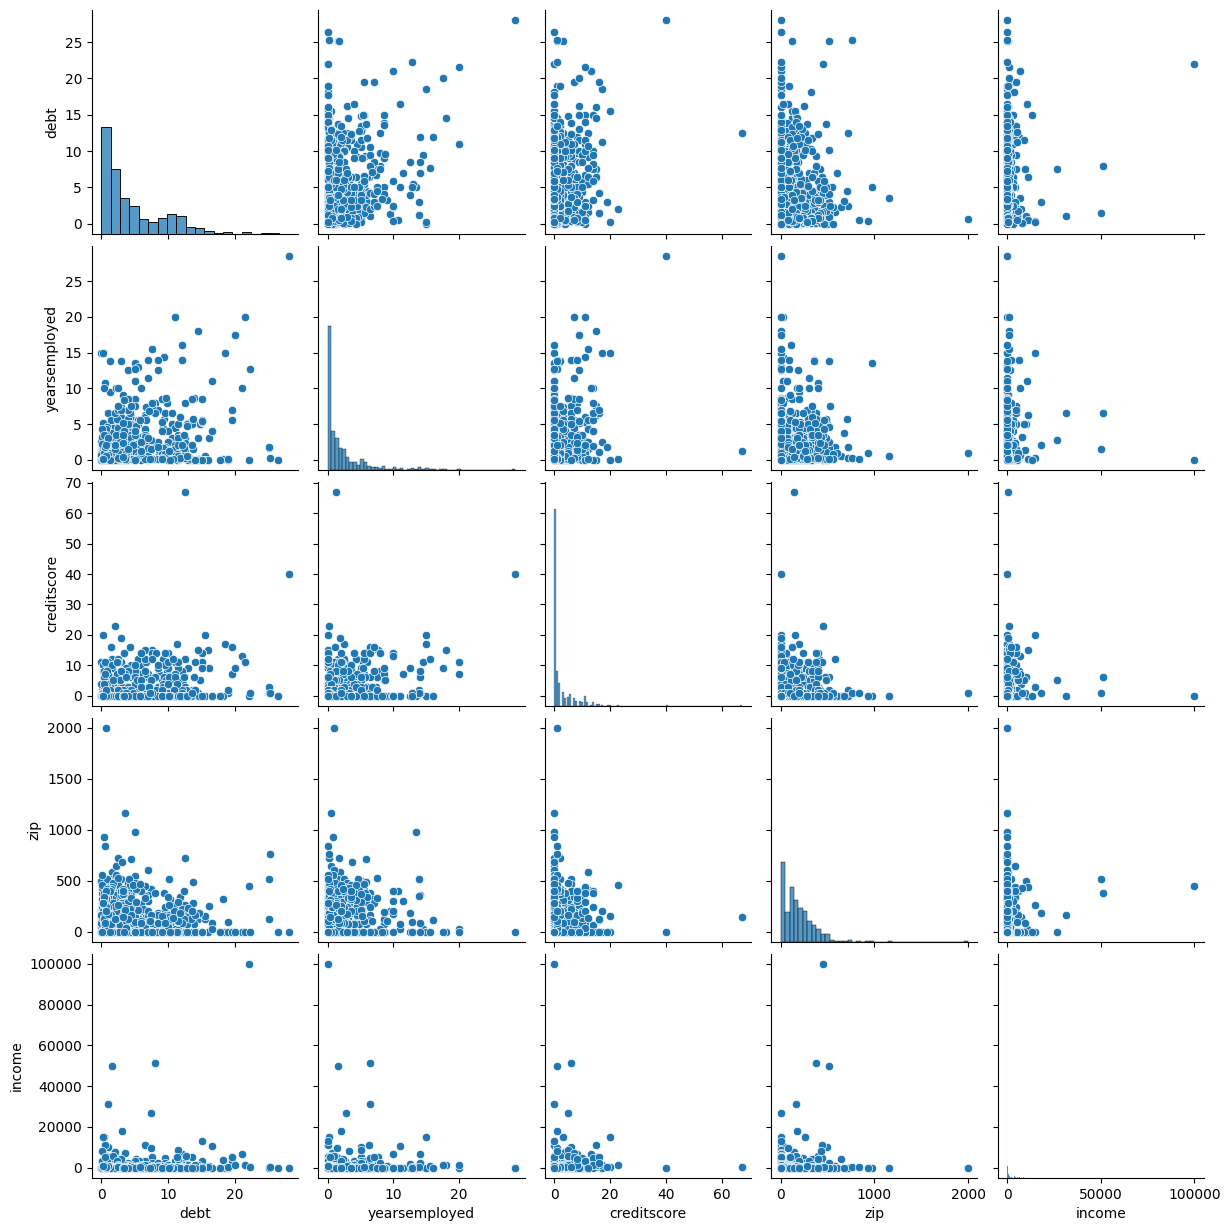


Split the data, dependent variable  10 , to keep  -1
10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 2
training data shape 
 (551, 10) 
training data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  28.000000  1.000000      1.000000      28.500000      1.000000  1.000000   
1   0.000000  0.000000      0.000000       0.000000      0.000000  0.000000   
2   4.830789  0.751361      0.754991       2.368875      0.551724  0.421053   
3   5.006157  0.432224      0.430093       3.454676      0.497317  0.493728   

   creditscore  driverslicense          zip         income  
0    67.000000        1.000000  2000.000000  100000.000000  
1     0.000000        0.000000     0.000000       0.000000  
2     2.450091        0.450091   182.301270    1109.326679  
3     5.134556        0.497503   179.484359    5762.338089  

dev data shape 
 (69, 10) 
dev data max, min, mean, std
         debt   married  bankcustomer  yearsemployed  priordefault  employed  \
0  2

In [22]:
transformedTrain, transformedDev, transformedTest, trainY, devY, testY, columns = fEU.prepData(dataName="cc", type="classification", fractionToKeep=-1)

2
3
4
5
6
7
8
9


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

10
11
12
13
14


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

15
16
17
18
19


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

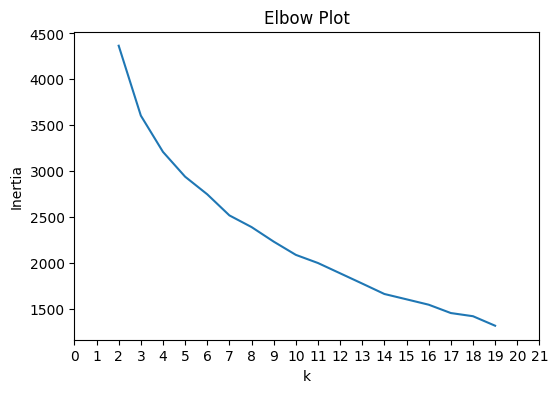

CPU times: user 1.45 s, sys: 44.2 ms, total: 1.5 s
Wall time: 958 ms


In [23]:
%%time

# Get the number of prototypes; this is hyperparameter tuning

rbf = fEU.RBFNetwork(type="classification")
rbf.explorePrototypes(transformedTrain, 2, 20, 1)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[38  1]
 [10 21]]


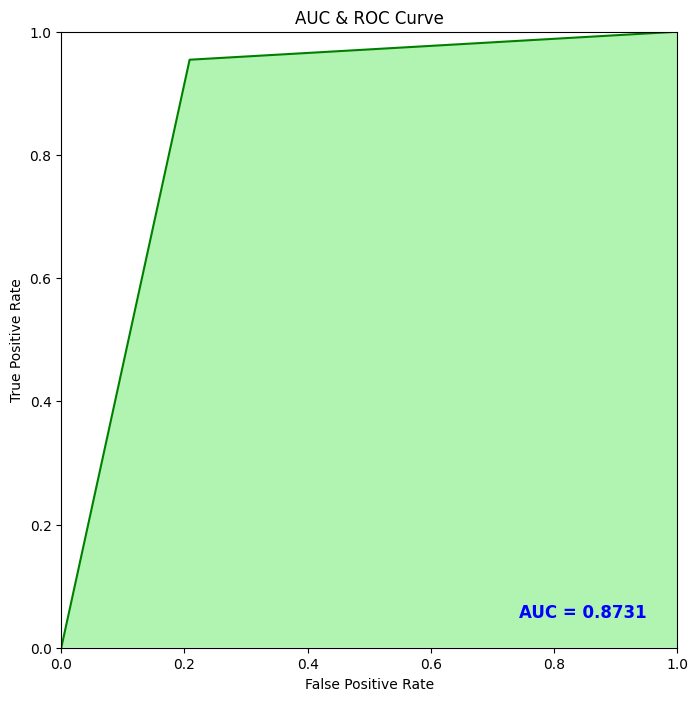

CPU times: user 398 ms, sys: 51.9 ms, total: 450 ms
Wall time: 333 ms


In [24]:
%%time

rbf.fit(transformedTrain, trainY, 15)
yhat = rbf.predict(transformedTest)
rbf.score(testY, yhat)
print(confusion_matrix(testY, yhat))
fEU.aucRoc(yhat, testY)